In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
url="https://raw.githubusercontent.com/anvarnarz/praktikum_datasets/main/breast-cancer.csv"
df = pd.read_csv(url)
df.sample(10)

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
566,926954,M,16.600,28.08,108.30,858.1,0.08455,0.10230,0.092510,0.05302,...,18.98,34.12,126.70,1124.0,0.11390,0.30940,0.34030,0.14180,0.2218,0.07820
237,883263,M,20.480,21.46,132.50,1306.0,0.08355,0.08348,0.090420,0.06022,...,24.22,26.17,161.70,1750.0,0.12280,0.23110,0.31580,0.14450,0.2238,0.07127
343,898431,M,19.680,21.68,129.90,1194.0,0.09797,0.13390,0.186300,0.11030,...,22.75,34.66,157.60,1540.0,0.12180,0.34580,0.47340,0.22550,0.4045,0.07918
89,861598,B,14.640,15.24,95.77,651.9,0.11320,0.13390,0.099660,0.07064,...,16.34,18.24,109.40,803.6,0.12770,0.30890,0.26040,0.13970,0.3151,0.08473
459,9112712,B,9.755,28.20,61.68,290.9,0.07984,0.04626,0.015410,0.01043,...,10.67,36.92,68.03,349.9,0.11100,0.11090,0.07190,0.04866,0.2321,0.07211
556,924964,B,10.160,19.59,64.73,311.7,0.10030,0.07504,0.005025,0.01116,...,10.65,22.88,67.88,347.3,0.12650,0.12000,0.01005,0.02232,0.2262,0.06742
557,925236,B,9.423,27.88,59.26,271.3,0.08123,0.04971,0.000000,0.00000,...,10.49,34.24,66.50,330.6,0.10730,0.07158,0.00000,0.00000,0.2475,0.06969
217,8811779,B,10.200,17.48,65.05,321.2,0.08054,0.05907,0.057740,0.01071,...,11.48,24.47,75.40,403.7,0.09527,0.13970,0.19250,0.03571,0.2868,0.07809
63,859196,B,9.173,13.86,59.20,260.9,0.07721,0.08751,0.059880,0.02180,...,10.01,19.23,65.59,310.1,0.09836,0.16780,0.13970,0.05087,0.3282,0.08490
74,8610175,B,12.310,16.52,79.19,470.9,0.09172,0.06829,0.033720,0.02272,...,14.11,23.21,89.71,611.1,0.11760,0.18430,0.17030,0.08660,0.2618,0.07609


In [3]:

df['area_se']

,area_se
0,153.40
1,74.08
2,94.03
3,27.23
4,94.44
...,...
564,158.70
565,99.04
566,48.55
567,86.22


In [4]:
df['diagnosis'].value_counts()

,count
diagnosis,
B,357
M,212


In [5]:
from sklearn.preprocessing import LabelEncoder
labelencoder=LabelEncoder()
df['diagnosis']=labelencoder.fit_transform(df['diagnosis'])
df['diagnosis'].value_counts()

,count
diagnosis,
0,357
1,212


In [6]:
df.drop(columns=['id'], inplace=True)

In [7]:
corr_matrix=df.corr().abs()
corr_matrix.style.background_gradient(cmap='coolwarm')

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
diagnosis,1.000000,0.730029,0.415185,0.742636,0.708984,0.358560,0.596534,0.696360,0.776614,0.330499,0.012838,0.567134,0.008303,0.556141,0.548236,0.067016,0.292999,0.253730,0.408042,0.006522,0.077972,0.776454,0.456903,0.782914,0.733825,0.421465,0.590998,0.659610,0.793566,0.416294,0.323872
radius_mean,0.730029,1.000000,0.323782,0.997855,0.987357,0.170581,0.506124,0.676764,0.822529,0.147741,0.311631,0.679090,0.097317,0.674172,0.735864,0.222600,0.206000,0.194204,0.376169,0.104321,0.042641,0.969539,0.297008,0.965137,0.941082,0.119616,0.413463,0.526911,0.744214,0.163953,0.007066
texture_mean,0.415185,0.323782,1.000000,0.329533,0.321086,0.023389,0.236702,0.302418,0.293464,0.071401,0.076437,0.275869,0.386358,0.281673,0.259845,0.006614,0.191975,0.143293,0.163851,0.009127,0.054458,0.352573,0.912045,0.358040,0.343546,0.077503,0.277830,0.301025,0.295316,0.105008,0.119205
perimeter_mean,0.742636,0.997855,0.329533,1.000000,0.986507,0.207278,0.556936,0.716136,0.850977,0.183027,0.261477,0.691765,0.086761,0.693135,0.744983,0.202694,0.250744,0.228082,0.407217,0.081629,0.005523,0.969476,0.303038,0.970387,0.941550,0.150549,0.455774,0.563879,0.771241,0.189115,0.051019
area_mean,0.708984,0.987357,0.321086,0.986507,1.000000,0.177028,0.498502,0.685983,0.823269,0.151293,0.283110,0.732562,0.066280,0.726628,0.800086,0.166777,0.212583,0.207660,0.372320,0.072497,0.019887,0.962746,0.287489,0.959120,0.959213,0.123523,0.390410,0.512606,0.722017,0.143570,0.003738
smoothness_mean,0.358560,0.170581,0.023389,0.207278,0.177028,1.000000,0.659123,0.521984,0.553695,0.557775,0.584792,0.301467,0.068406,0.296092,0.246552,0.332375,0.318943,0.248396,0.380676,0.200774,0.283607,0.213120,0.036072,0.238853,0.206718,0.805324,0.472468,0.434926,0.503053,0.394309,0.499316
compactness_mean,0.596534,0.506124,0.236702,0.556936,0.498502,0.659123,1.000000,0.883121,0.831135,0.602641,0.565369,0.497473,0.046205,0.548905,0.455653,0.135299,0.738722,0.570517,0.642262,0.229977,0.507318,0.535315,0.248133,0.590210,0.509604,0.565541,0.865809,0.816275,0.815573,0.510223,0.687382
concavity_mean,0.696360,0.676764,0.302418,0.716136,0.685983,0.521984,0.883121,1.000000,0.921391,0.500667,0.336783,0.631925,0.076218,0.660391,0.617427,0.098564,0.670279,0.691270,0.683260,0.178009,0.449301,0.688236,0.299879,0.729565,0.675987,0.448822,0.754968,0.884103,0.861323,0.409464,0.514930
concave points_mean,0.776614,0.822529,0.293464,0.850977,0.823269,0.553695,0.831135,0.921391,1.000000,0.462497,0.166917,0.698050,0.021480,0.710650,0.690299,0.027653,0.490424,0.439167,0.615634,0.095351,0.257584,0.830318,0.292752,0.855923,0.809630,0.452753,0.667454,0.752399,0.910155,0.375744,0.368661
symmetry_mean,0.330499,0.147741,0.071401,0.183027,0.151293,0.557775,0.602641,0.500667,0.462497,1.000000,0.479921,0.303379,0.128053,0.313893,0.223970,0.187321,0.421659,0.342627,0.393298,0.449137,0.331786,0.185728,0.090651,0.219169,0.177193,0.426675,0.473200,0.433721,0.430297,0.699826,0.438413


In [8]:
df.corrwith(df['diagnosis']).abs().sort_values(ascending=False)

,0
diagnosis,1.000000
concave points_worst,0.793566
perimeter_worst,0.782914
concave points_mean,0.776614
radius_worst,0.776454
perimeter_mean,0.742636
area_worst,0.733825
radius_mean,0.730029
area_mean,0.708984
concavity_mean,0.696360


In [9]:
X=df.drop(columns=['diagnosis'],axis=1).values
y=df['diagnosis']

In [10]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
X=scaler.fit_transform(X)

In [11]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test =train_test_split(X,y, test_size=0.2, random_state=12)

In [12]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)

KNeighborsClassifier()

In [13]:
y_predict=knn.predict(X_test)

In [14]:
from sklearn.metrics import jaccard_score
jaccard_score(y_test, y_predict)

0.8958333333333334

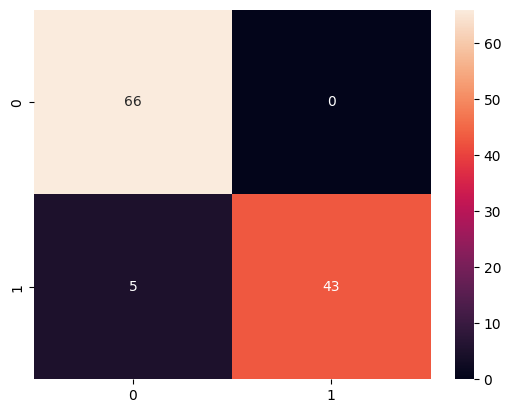

In [15]:
from sklearn.metrics import confusion_matrix
sns.heatmap(confusion_matrix(y_test, y_predict), annot=True)
plt.show()

In [16]:
from sklearn.metrics import precision_score, recall_score,f1_score,accuracy_score
precision=precision_score(y_test, y_predict)
recall=recall_score(y_test, y_predict)
f1=f1_score(y_test, y_predict)
accuracy=accuracy_score(y_test, y_predict)
print(f"{precision=}\n{recall=}\n{f1=}\n{accuracy=}")

precision=1.0
recall=0.8958333333333334
f1=0.945054945054945
accuracy=0.956140350877193


# **cross-validation**

In [17]:
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import classification_report
predict=cross_val_predict(estimator=knn, X=X, y=y, cv=5)


print(classification_report(y, predict))

              precision    recall  f1-score   support

           0       0.96      0.98      0.97       357
           1       0.97      0.93      0.95       212

    accuracy                           0.96       569
   macro avg       0.97      0.96      0.96       569
weighted avg       0.96      0.96      0.96       569



In [18]:
from sklearn.model_selection import GridSearchCV
param_grid={'n_neighbors':np.arange(1,25)}
knn=KNeighborsClassifier()
knn_cv=GridSearchCV(knn, param_grid, cv=5)
knn_cv.fit(X,y)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24])})

In [19]:
knn_cv.best_params_

{'n_neighbors': 9}

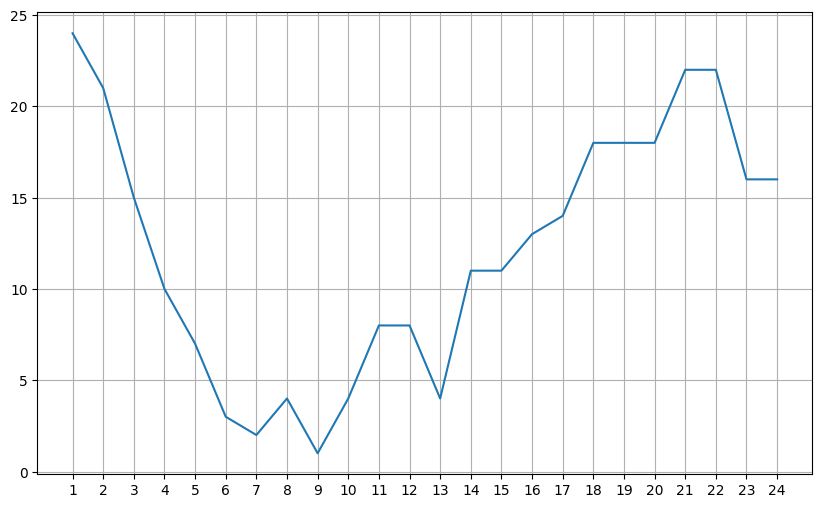

In [20]:
plt.figure(figsize=(10,6))
plt.plot(param_grid['n_neighbors'], knn_cv.cv_results_['rank_test_score'])
plt.xticks(param_grid['n_neighbors'])
plt.grid()
plt.show()

In [44]:
print("Model classes:", knn_cv.classes_)


Model classes: [0 1]


In [43]:
print(df.loc[[49]].to_csv(index=False, header=False).strip())

0,13.49,22.3,86.91,561.0,0.08752,0.07698,0.04751,0.03384,0.1809,0.05718,0.2338,1.353,1.735,20.2,0.004455,0.01382,0.02095,0.01184,0.01641,0.001956,15.15,31.82,99.0,698.8,0.1162,0.1711,0.2282,0.1282,0.2871,0.06917


In [46]:
filename = 'knn_model.joblib'
joblib.dump(knn_cv, open(filename, 'wb'))

In [45]:


import joblib

scaler_file = "scaler.joblib"
joblib.dump(scaler, scaler_file)

['scaler.joblib']

In [41]:
import joblib
import numpy as np

# Load the trained k-NN model
model_file = "knn_model.joblib"  # Update the path if needed
knn = joblib.load(model_file)

# Load the StandardScaler (used for scaling inputs during training)
scaler_file = "scaler.joblib"  # Update the path if needed
scaler = joblib.load(scaler_file)

# Input values
input_data = np.array([[
    13.49,22.3,86.91,561.0,0.08752,0.07698,
    0.04751,0.03384,0.1809,0.05718,0.2338,
    1.353,1.735,20.2,0.004455,0.01382,0.02095,0.01184,0.01641,
    0.001956,15.15,31.82,99.0,698.8,0.1162,0.1711,
    0.2282,0.1282,0.2871,0.06917
]])

# Scale the input data
scaled_input = scaler.transform(input_data)

# Predict diagnosis (0: Malignant, 1: Benign)
prediction = knn.predict(scaled_input)
prediction_proba = knn.predict_proba(scaled_input)

# Output results
if prediction[0] == 0:
    print("Prediction: Benign")
else:
    print("Prediction: Malignant")


Prediction: Benign


In [47]:

print("Predicted probabilities:", prediction_proba)

# Get the probability of the predicted class
predicted_probability = prediction_proba[0, prediction[0]]
print(f"Probability of {prediction[0]} : {predicted_probability}")

# Convert probability to percentage and display
percentage = predicted_probability * 100
print(f"Percentage: {percentage:.2f}%")

Predicted probabilities: [[0.77777778 0.22222222]]
Probability of 0 : 0.7777777777777778
Percentage: 77.78%
